In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data
All data collected is from ERA5 Reanalysis for 2018

In [2]:
dat=xr.open_dataset('ERA5/2018_T.nc')
sol=xr.open_dataset('ERA5/TOA_solar_2018.nc')
q = xr.open_dataset('ERA5/2018_q.nc')

In [3]:
T_init = []
for i in range(3):
    T_init.append(dat['t'].sel(latitude=slice(90-10*i,80-10*i)).mean(dim='longitude').groupby('time.month').mean(dim='time').mean(dim='latitude')[0].data)

In [4]:
pole_sc = []
pole_insol = []
pole_q = []

for i in range(3):
    pole_sc.append(dat['t'].sel(latitude=slice(90-10*i,80-10*i)).mean(dim='longitude').groupby('time.month').mean(dim='time').mean(dim='latitude'))
    pole_insol.append(sol['tisr'].sel(latitude=slice(90-10*i,80-10*i)).mean(dim='longitude').groupby('valid_time.date').mean(dim='valid_time').mean(dim='latitude'))
    pole_q.append(q['q'].sel(latitude=slice(90-10*i,80-10*i)).mean(dim='longitude').groupby('time.date').mean(dim='time').mean(dim='latitude'))

In [5]:
scT = []
for i in range(3):
    scT.append(dat['t'].sel(latitude=slice(90-10*i,80-10*i)).mean(dim='longitude').groupby('time.date').mean(dim='time').mean(dim='latitude'))

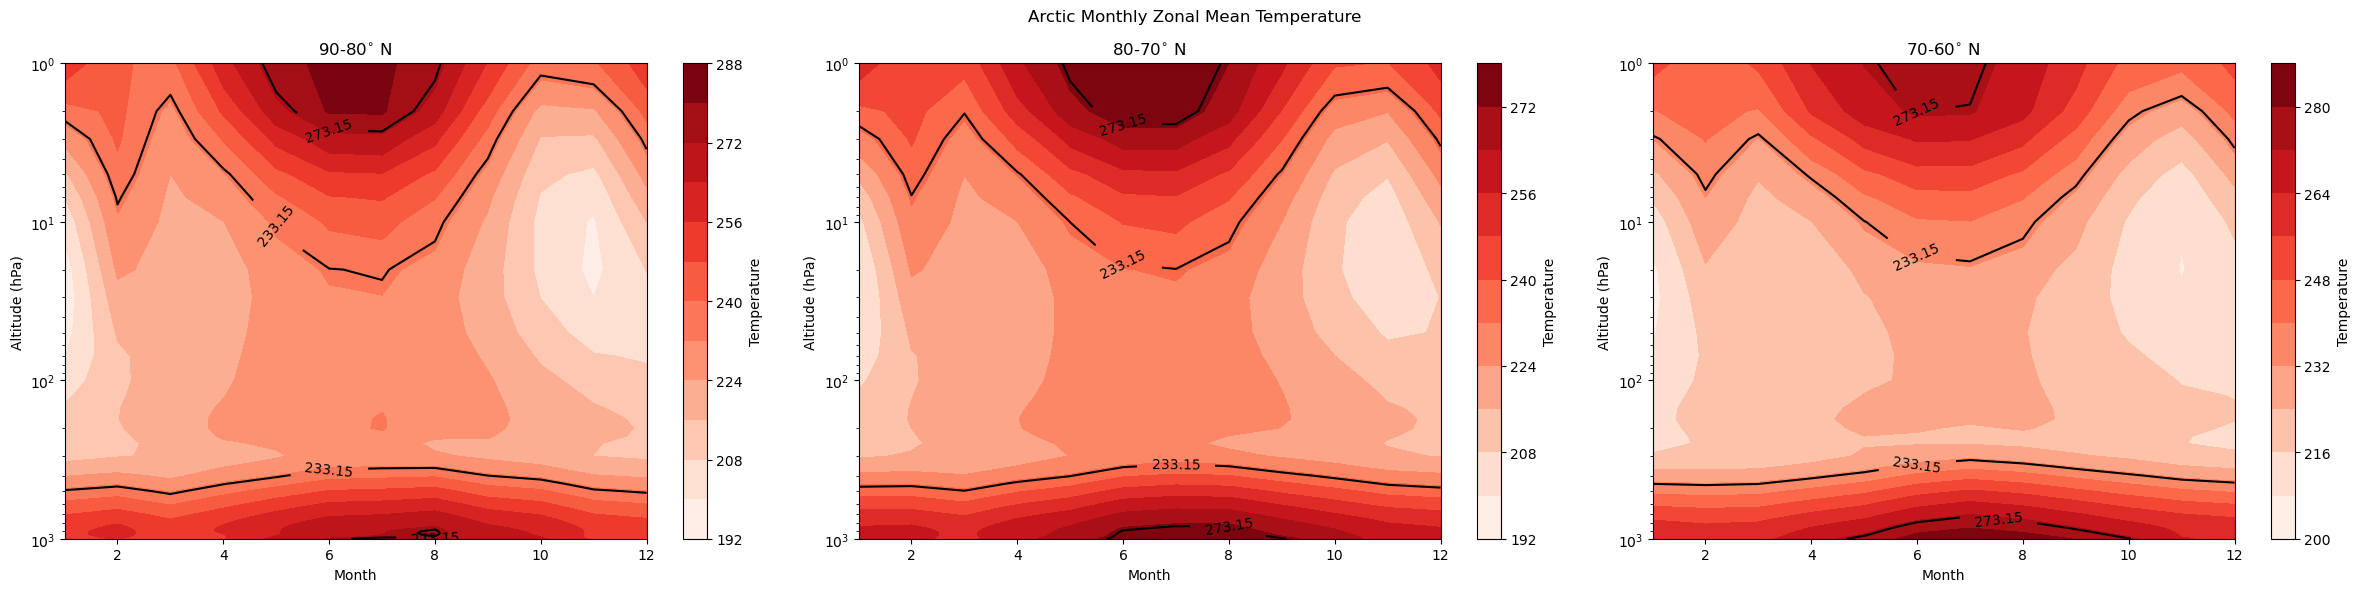

In [12]:
fig, ax =  plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Arctic Monthly Zonal Mean Temperature')
for i in range(3):
    cs = ax[i].contourf(pole_sc[i]['month'], pole_sc[i]['level'], pole_sc[i].transpose('level', 'month'), cmap='Reds', levels = 10)
    cs2 = ax[i].contour(pole_sc[i]['month'], pole_sc[i]['level'], pole_sc[i].transpose('level', 'month'), levels=[233.15, 273.15], colors='black', linewidths=1.5)
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Temperature', ax=ax[i])
    ax[i].clabel(cs2)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_T_all.png')

 



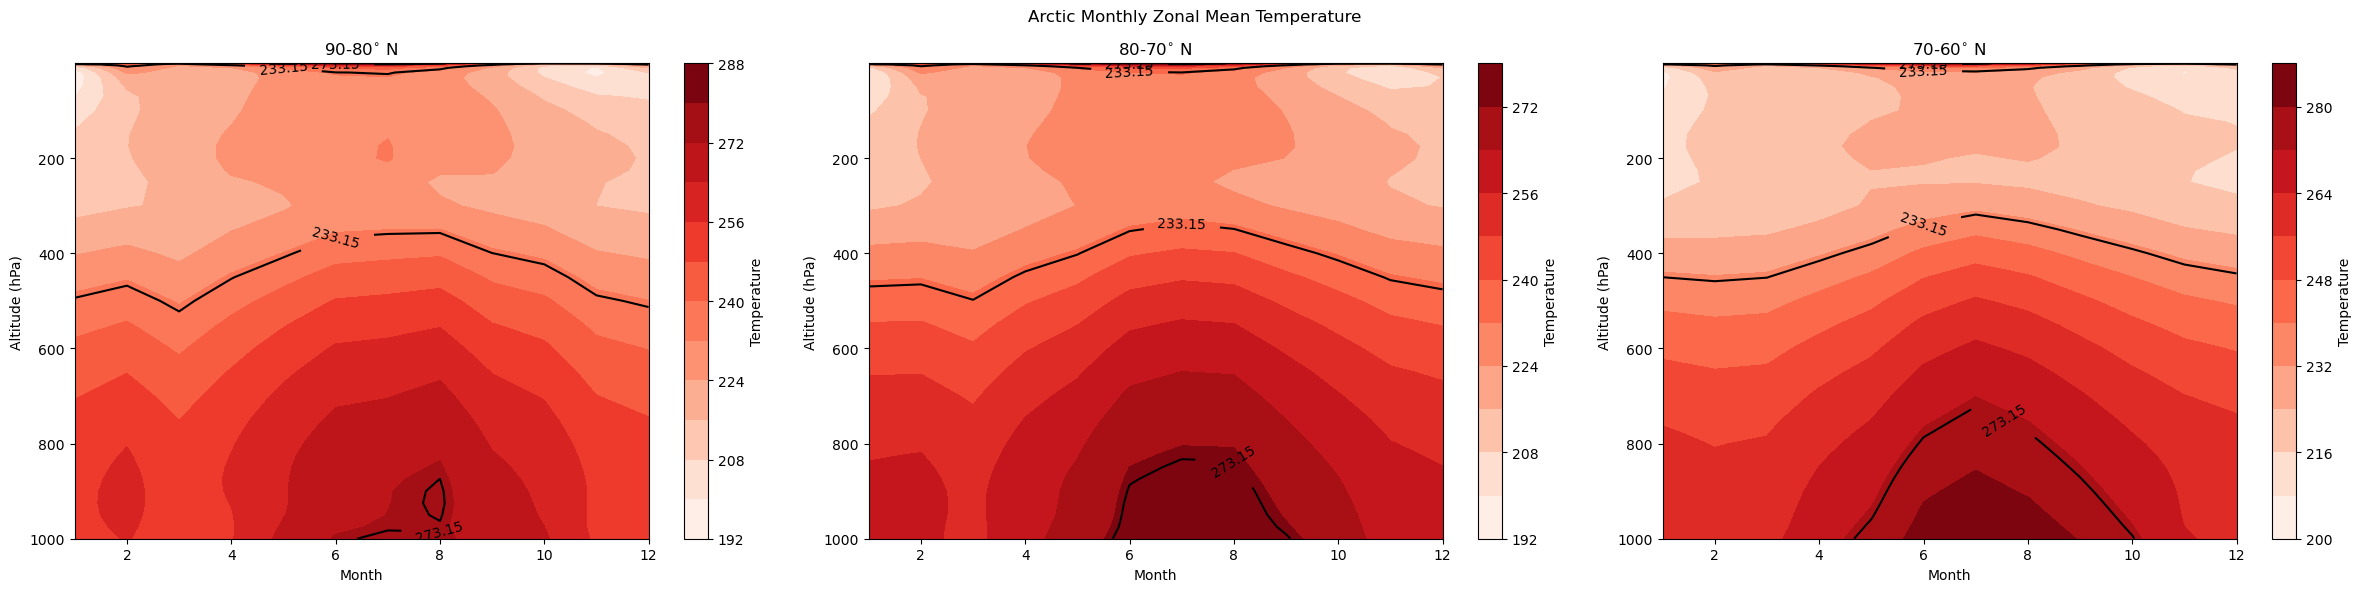

In [19]:
fig, ax =  plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Arctic Monthly Zonal Mean Temperature')
for i in range(3):
    cs = ax[i].contourf(pole_sc[i]['month'], pole_sc[i]['level'], pole_sc[i].transpose('level', 'month'), cmap='Reds', levels = 10)
    cs2 = ax[i].contour(pole_sc[i]['month'], pole_sc[i]['level'], pole_sc[i].transpose('level', 'month'), levels=[233.15, 273.15], colors='black', linewidths=1.5)
    # ax[i].set_yscale('log')
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Temperature', ax=ax[i])
    ax[i].clabel(cs2)
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_T_lin.png')

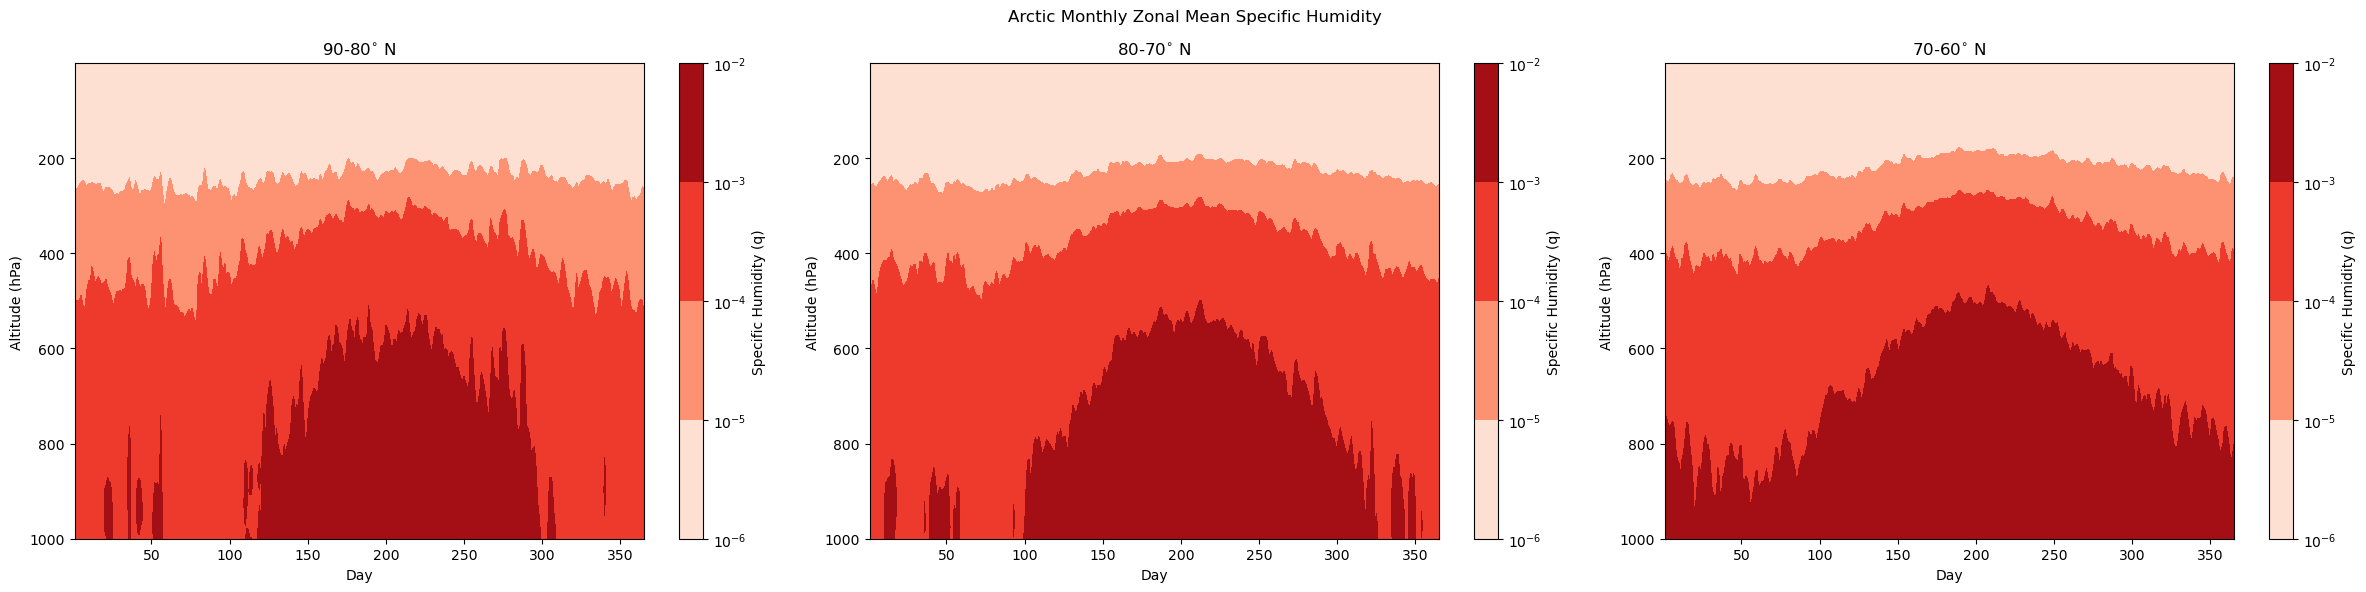

In [20]:
from matplotlib.colors import LogNorm
fig, ax =  plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Arctic Monthly Zonal Mean Specific Humidity')
for i in range(3):
    cs = ax[i].contourf(pd.to_datetime(pole_q[i]['date'].values).dayofyear, pole_q[i]['level'], pole_q[i].transpose('level', 'date'), norm=LogNorm(), cmap='Reds', levels = 5)
    # ax[i].set_yscale('log')
    ax[i].set_xlabel('Day')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Specific Humidity (q)', ax=ax[i])
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/Mean_q_all.png')

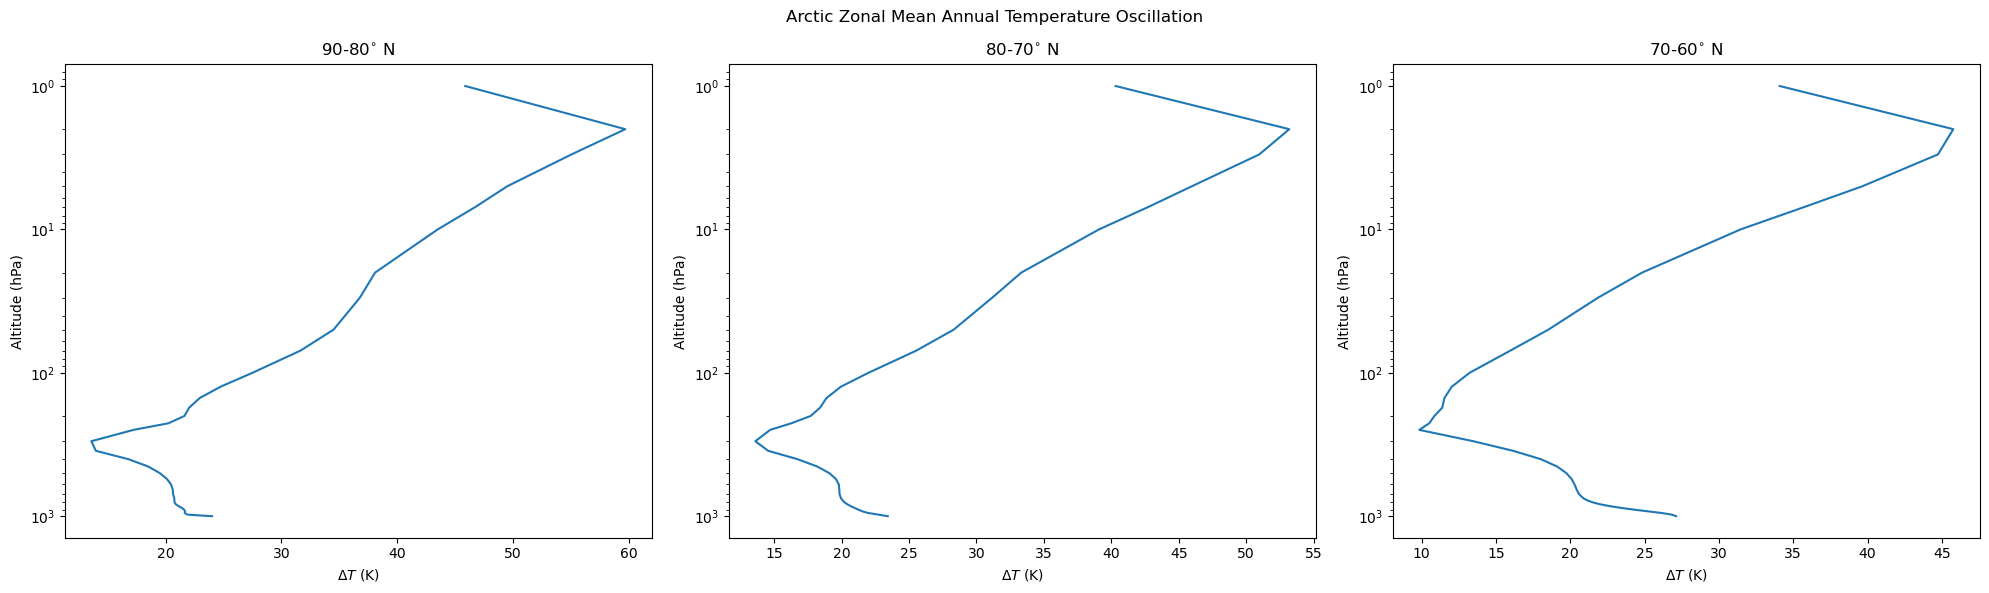

In [21]:
fig, ax =  plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Arctic Zonal Mean Annual Temperature Oscillation')
for i in range(3):
    cs = ax[i].plot(pole_sc[i].max(dim='month')-pole_sc[i].min(dim='month'), pole_sc[i]['level'])
    ax[i].set_yscale('log')
    ax[i].set_xlabel(r'$\Delta T$ (K)')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots_ERA5/T_osci.png')

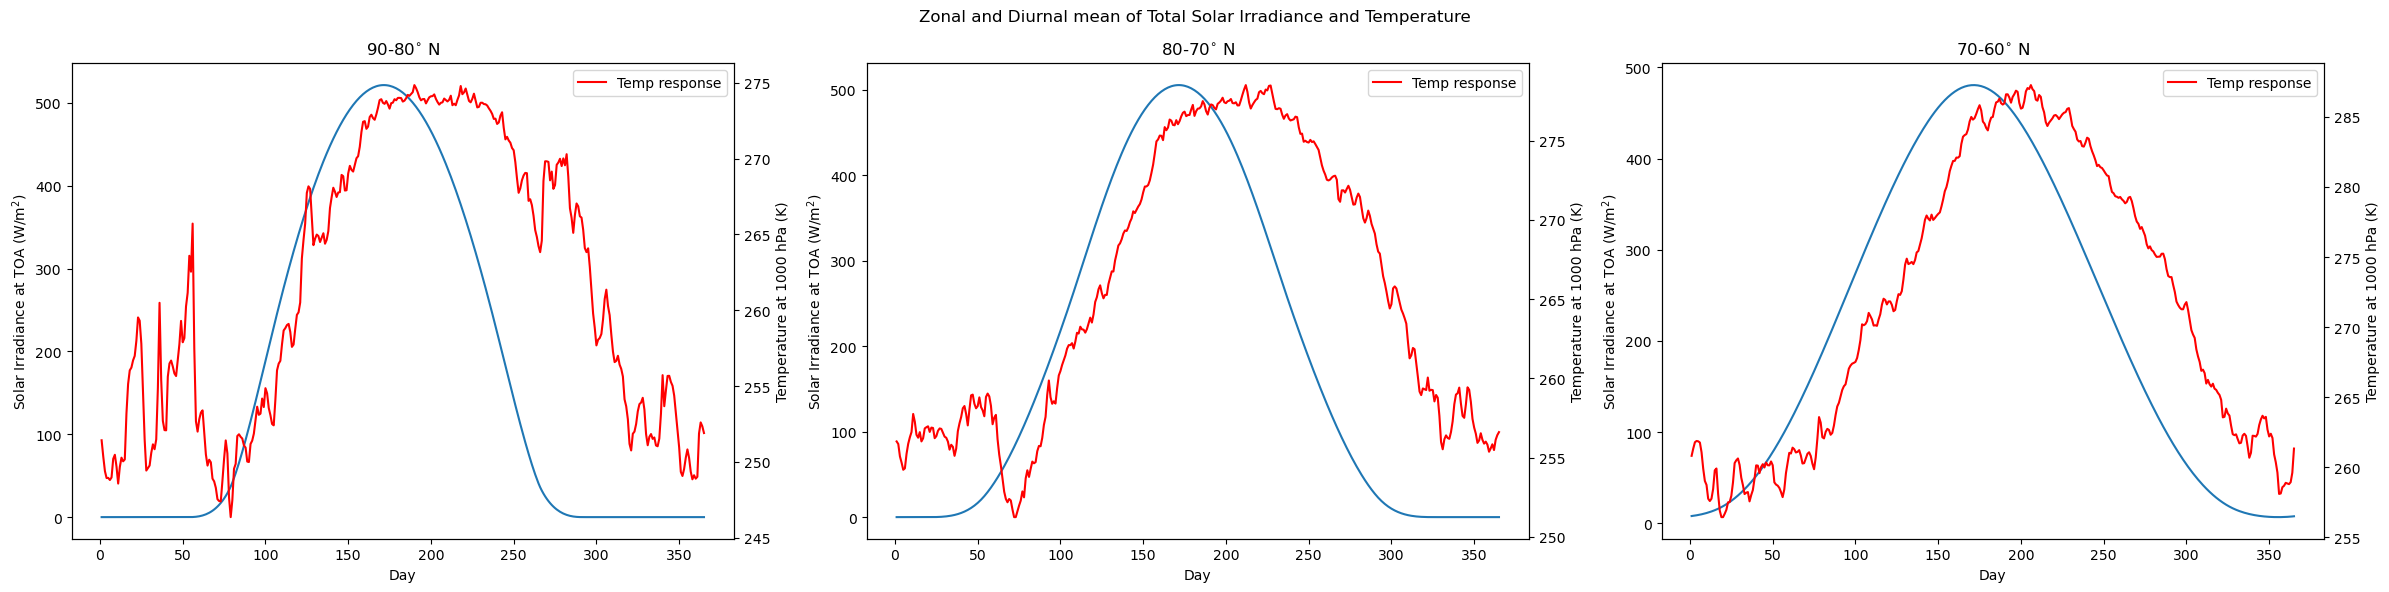

In [22]:
fig, ax =  plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Zonal and Diurnal mean of Total Solar Irradiance and Temperature')
for i in range(3):
    lev = 1000
    ax2 = ax[i].twinx()
    ax[i].plot(pd.to_datetime(pole_insol[i]['date'].values).dayofyear, pole_insol[i]/3600, label='Insolation')
    ax2.plot(pd.to_datetime(pole_insol[i]['date'].values).dayofyear, scT[i].sel(level=lev), label='Temp response', color='red')
    ax[i].set_xlabel('Day')
    ax[i].set_ylabel('Solar Irradiance at TOA (W/m$^2$)')
    ax2.set_ylabel('Temperature at '+str(lev)+' hPa (K)')
    # plt.xticks(np.arange(1,12,1))
    ax[i].set_title(''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    ax2.legend()
plt.tight_layout()
fig.savefig('Plots_ERA5/Inso&T'+str(lev)+'.png')

In [26]:
dat

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 365, bnds: 2, longitude: 144, latitude: 73, level: 37)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2018-01-01T11:00:00 ... 2018-12-31T1...
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * latitude   (latitude) float32 292B 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * level      (level) float64 296B 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB ...
    t          (time, level, latitude, longitude) float64 1GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Apr 11 11:59:43 2021: cdo -s -b F64 mergetime /home/yan...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...